In [1]:
%cd /Users/sylee/Desktop/project/open

/Users/sylee/Desktop/project/open


In [2]:
!pwd

/Users/sylee/Desktop/project/open


In [3]:
import os
import cv2
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
pd.set_option('display.max.colwidth', 150)
pd.set_option('display.max.row', 500)

## train_mask  확인

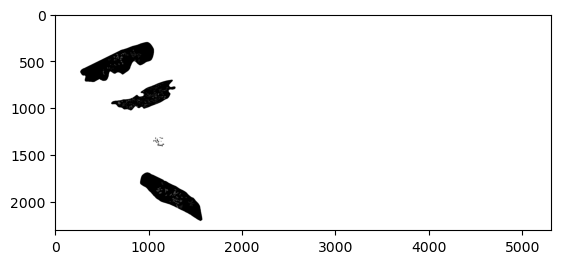

In [4]:
trian_mask_test_img = './train_masks/BC_01_0015.png'
img = cv2.imread(trian_mask_test_img, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

## 사용자 함수

### 이미지 자르는 사용자 함수

In [5]:
def Img_Crop(input_dir, input_img_list, crop_size, output_dir, flags):
    print('img_crop 중...') 
    output_dir = input_dir+'_cropped'
#     if ~os.path.exists(output_dir):
#         os.makedirs(output_dir)
    img_list = [os.path.join(input_dir, img_name) for img_name in input_img_list]
    for img in tqdm(img_list):
        cv2_img = cv2.imread(img, flags)
        for row, start_y_pixel in enumerate(range(0, cv2_img.shape[0], crop_size)):
            for col, start_x_pixel in enumerate(range(0, cv2_img.shape[1], crop_size)):
                croped_img = cv2_img[start_y_pixel:start_y_pixel + crop_size, start_x_pixel:start_x_pixel+crop_size]
                cv2.imwrite(f'{output_dir}/{img.split("/")[-1].split(".")[0]}_({row+1:03d},{col+1:03d}).png', croped_img)
    print('완료')

### 명도 측정 사용자 함수

In [6]:
def Value_Measure(input_dir, input_img_list, crop_size):
    print('Value_Measure 중...')
    df = pd.DataFrame(columns=['img_name', 'value', 'class'])
    df['img_name'] = pd.Series(input_img_list)
    img_list = [os.path.join(input_dir, img_name) for img_name in input_img_list]
    for index, img in tqdm(enumerate(img_list)):
        li = []
        cv2_img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        for i in range(cv2_img.shape[0]):
            for j in range(cv2_img.shape[1]):
                li.append(cv2_img[i,j])
        
        df.loc[index]['value'] = pd.Series(li).value_counts().to_dict()
        
#         if df['class'].iloc[index]
    print('완료')
    return df

## train_masks 이미지 자르기

In [7]:
# # train masks dir
# train_masks_dir = './train_masks'
# # train masks image list
# train_masks_list = sorted(os.listdir(train_masks_dir))[0:]


# # 크롭하려는 img 폴더
# input_dir = train_masks_dir
# # 크롭하려는 img list
# input_img_list = train_masks_list
# # 크롭할 사이즈
# crop_size = 512
# # 크롬된 img 저장 폴더
# output_dir = './train_masks_cropped'

# # image cropping
# Img_Crop(input_dir, input_img_list, crop_size, output_dir, cv2.IMREAD_GRAYSCALE)

## train_imgs 이미지 자르기

In [8]:
# # train masks dir
# train_imgs_dir = './train_imgs'
# # train masks image list
# train_imgs_list = sorted(os.listdir(train_imgs_dir))[0:]
# # train_imgs_list = train_masks_list


# # 크롭하려는 img 폴더
# input_dir = train_imgs_dir
# # 크롭하려는 img list
# input_img_list = train_imgs_list
# # 크롭할 사이즈
# crop_size = 512
# # 크롬된 img 저장 폴더
# output_dir = './train_imgs_cropped'

# # image cropping
# Img_Crop(input_dir, input_img_list, crop_size, output_dir, cv2.IMREAD_UNCHANGED)

## 명도 측정

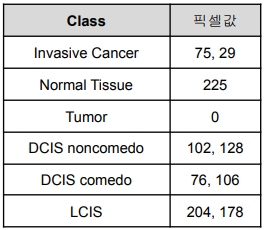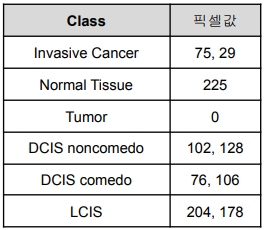

In [9]:
# # 크롭된 이미지 명도 측정
# cropped_train_mask_img_dir = './train_masks_cropped'
# cropped_train_mask_img_list = sorted(os.listdir(cropped_train_mask_img_dir))[0:]


# # 명도 측정할 img 폴더
# input_dir = cropped_train_mask_img_dir
# # 명도 측정할 img list
# input_img_list = cropped_train_mask_img_list
# # 크롭할 사이즈
# crop_size = crop_size


# df = Value_Measure(input_dir, input_img_list, crop_size)
# df


In [10]:
# df.to_pickle('마스킹_명도.pkl')
df = pd.read_pickle('마스킹_명도.pkl')

In [11]:
# # 마스킹된 곳만 
# tl=[]
# for i in range(len(df)):
#     if len(df.value[i].keys()) != 1:
#         tl.append(df.img_name[i])
# tl

# #파일 복사
# import shutil

# for i in tl:
#     s = './train_masks_cropped/'+i
#     d = './masks_without_white/'+i
#     shutil.copyfile(s, d)
    
# for i in tl:
#     s = './train_imgs_cropped/'+i
#     d = './imgs_without_white/'+i
#     shutil.copyfile(s, d)

In [12]:
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torch
import cv2
from torchvision import transforms, datasets
from torchvision.transforms import ToPILImage
import torch.nn as nn
import torch.utils as utils
import torch.nn.init as init
import torch.utils.data as data
import torchvision.utils as v_utils
import torchvision.datasets as dset
import torchvision.transforms as transforms

In [13]:
files1 = [f for f in listdir('./imgs_without_white') if isfile(join('./imgs_without_white', f))]
files2 = [f for f in listdir('./masks_without_white') if isfile(join('./masks_without_white', f))]
test_image_name = [x for x in files1 if x.find("png") != -1]
mask_image_name = [x for x in files2 if x.find("png") != -1]

print('File 개수 확인')
print(len(test_image_name))
print(len(mask_image_name))

File 개수 확인
628
628


In [14]:
files1

['BC_01_0907_(003,003).png',
 'BC_01_0516_(005,003).png',
 'BC_01_0883_(004,003).png',
 'BC_01_0883_(005,003).png',
 'BC_01_0583_(001,003).png',
 'BC_01_0673_(003,003).png',
 'BC_01_0673_(002,003).png',
 'BC_01_0510_(001,003).png',
 'BC_01_0609_(002,004).png',
 'BC_01_0674_(003,002).png',
 'BC_01_0609_(003,004).png',
 'BC_01_0674_(002,002).png',
 'BC_01_0893_(004,002).png',
 'BC_01_0425_(002,008).png',
 'BC_01_0585_(004,003).png',
 'BC_01_0925_(005,001).png',
 'BC_01_0612_(005,006).png',
 'BC_01_0612_(004,006).png',
 'BC_01_0591_(005,002).png',
 'BC_01_0459_(002,001).png',
 'BC_01_0609_(004,003).png',
 'BC_01_0591_(004,002).png',
 'BC_01_0471_(004,008).png',
 'BC_01_0585_(003,004).png',
 'BC_01_0893_(003,005).png',
 'BC_01_0471_(005,008).png',
 'BC_01_0585_(002,004).png',
 'BC_01_0516_(003,004).png',
 'BC_01_0516_(002,004).png',
 'BC_01_0530_(003,001).png',
 'BC_01_0907_(005,004).png',
 'BC_01_0515_(004,002).png',
 'BC_01_0907_(004,004).png',
 'BC_01_0673_(004,004).png',
 'BC_01_0883_(

In [15]:
print('Deviece 확인')
device = torch.device("mps:0" if torch.backends.mps.is_available() else "cpu")
print(device)


loader = transforms.Compose([
    transforms.ToTensor()])  # 토치 텐서로 변환


def image_loader(image_name):
    image = Image.open(image_name)
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)

train = []
label = []

for i in range(len(test_image_name)):
    image = image_loader('./imgs_without_white/' + test_image_name[i])
    train.append(image)

for i in range(len(mask_image_name)):
    image = image_loader('./masks_without_white/' + mask_image_name[i])
    label.append(image)

Deviece 확인
mps:0


In [16]:
print('Train Image -> Tensor 확인')
print(len(train))
print(train[1].size())
print(train[1])
print('Label Image -> Tensor 확인')
print(len(label))
print(label[1].size())
print(label[1])

Train Image -> Tensor 확인
628
torch.Size([1, 3, 512, 512])
tensor([[[[0.9333, 0.8863, 0.9176,  ..., 0.9569, 0.9569, 0.9569],
          [0.8510, 0.9176, 0.8588,  ..., 0.9569, 0.9569, 0.9569],
          [0.8510, 0.8902, 0.9373,  ..., 0.9569, 0.9569, 0.9569],
          ...,
          [0.5412, 0.8980, 0.8392,  ..., 0.9569, 0.9569, 0.9569],
          [0.5529, 0.8392, 0.8941,  ..., 0.9569, 0.9569, 0.9569],
          [0.5961, 0.4824, 0.8941,  ..., 0.9569, 0.9569, 0.9569]],

         [[0.8902, 0.8078, 0.8588,  ..., 0.9569, 0.9569, 0.9569],
          [0.7961, 0.8902, 0.8196,  ..., 0.9569, 0.9569, 0.9569],
          [0.8039, 0.8314, 0.8863,  ..., 0.9569, 0.9569, 0.9569],
          ...,
          [0.3176, 0.8000, 0.8000,  ..., 0.9569, 0.9569, 0.9569],
          [0.3490, 0.6863, 0.7647,  ..., 0.9569, 0.9569, 0.9569],
          [0.4431, 0.3020, 0.7686,  ..., 0.9569, 0.9569, 0.9569]],

         [[0.9176, 0.8588, 0.8902,  ..., 0.9569, 0.9569, 0.9569],
          [0.8510, 0.9059, 0.8392,  ..., 0.9569, 0

/opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.9/site-packages/torch/_tensor_str.py:115: UserWarning: The operator 'aten::nonzero' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1666646703877/work/aten/src/ATen/mps/MPSFallback.mm:11.)
  nonzero_finite_vals = torch.masked_select(


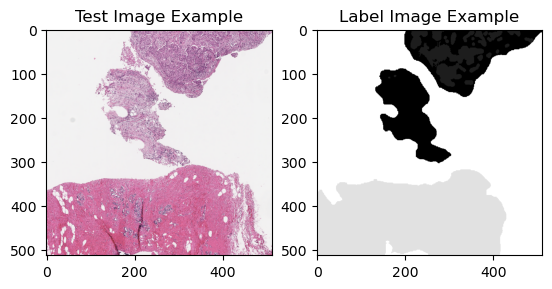

In [17]:
unloader = transforms.ToPILImage()

def imshow1(tensor, title=None):
    image = tensor.cpu().clone()  # 텐서의 값에 변화가 적용되지 않도록 텐서를 복제합니다
    image = image.squeeze(0)      # 페이크 배치 차원을 제거 합니다
    image = unloader(image)
    plt.imshow(image)
    

def imshow2(tensor, title=None):
    image = tensor.cpu().clone()  # 텐서의 값에 변화가 적용되지 않도록 텐서를 복제합니다
    image = image.squeeze(0)      # 페이크 배치 차원을 제거 합니다
    image = unloader(image)
    plt.imshow(image, cmap='gray')
    
test_image_example = plt.subplot(1,2,1)
test_image_example.set_title('Test Image Example')
imshow1(train[2])

label_image_example = plt.subplot(1,2,2)
label_image_example.set_title('Label Image Example')
imshow2(label[2])

In [18]:
# # 사이즈 512 로 만들기
# for i in files:
#     wb = torch.zeros(512,512,3) +243
#     wb = np.array(wb).astype('int')
#     src = cv2.imread('./imgs_without_white/'+i, cv2.IMREAD_UNCHANGED)
#     height, width, channel = src.shape
#     if width or height !=512:
#         wb[0:height, 0:width] = src
#         cv2.imwrite('./imgs_without_white/'+i, wb)

# for i in files:
#     wb = torch.zeros(512,512) +255
#     wb = np.array(wb).astype('int')
#     src = cv2.imread('./masks_without_white/'+i, cv2.IMREAD_UNCHANGED)
#     height, width = src.shape
#     if width or height !=512:
#         wb[0:height, 0:width] = src
#         cv2.imwrite('./masks_without_white/'+i, wb)
        

In [19]:
train_batch = []
label_batch = []
batch_size = 4
for i in range(0,len(train),batch_size):
    train_batch.append(torch.cat([train[i],train[i+1]]))

for i in range(0,len(label),batch_size):
    try:
        label_batch.append(torch.cat([label[i],label[i+1]]))
    except:
        pass

In [20]:
print('Batch 개수 확인')
print(len(train_batch))
print(len(label_batch))
print('Batch Tensor 정보 확인')
print(label_batch[0].size())

Batch 개수 확인
157
157
Batch Tensor 정보 확인
torch.Size([2, 1, 512, 512])


In [21]:
# 자주 쓰는 연산들과 항상 세트로 쓰는 연산들은 편의를 위해 함수로 정의해 놓습니다.

def conv_block(in_dim,out_dim,act_fn):
    model = nn.Sequential(
        nn.Conv2d(in_dim,out_dim, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(out_dim),
        act_fn,
    )
    return model

def conv_trans_block(in_dim,out_dim,act_fn):
    model = nn.Sequential(
        nn.ConvTranspose2d(in_dim,out_dim, kernel_size=3, stride=2, padding=1,output_padding=1),
        nn.BatchNorm2d(out_dim),
        act_fn,
    )
    return model

def maxpool():
    pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
    return pool

def conv_block_2(in_dim,out_dim,act_fn):
    model = nn.Sequential(
        conv_block(in_dim,out_dim,act_fn),
        nn.Conv2d(out_dim,out_dim, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(out_dim),
    )
    return model    

In [22]:
class UnetGenerator(nn.Module):
    def __init__(self,in_dim,out_dim,num_filter):
        super(UnetGenerator,self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.num_filter = num_filter
        act_fn = nn.LeakyReLU(0.2, inplace=True)

        print("\n------Initiating U-Net------\n")

        self.down_1 = conv_block_2(self.in_dim,self.num_filter,act_fn)
        self.pool_1 = maxpool()
        self.down_2 = conv_block_2(self.num_filter*1,self.num_filter*2,act_fn)
        self.pool_2 = maxpool()
        self.down_3 = conv_block_2(self.num_filter*2,self.num_filter*4,act_fn)
        self.pool_3 = maxpool()
        self.down_4 = conv_block_2(self.num_filter*4,self.num_filter*8,act_fn)
        self.pool_4 = maxpool()

        self.bridge = conv_block_2(self.num_filter*8,self.num_filter*16,act_fn)

        self.trans_1 = conv_trans_block(self.num_filter*16,self.num_filter*8,act_fn)
        self.up_1 = conv_block_2(self.num_filter*16,self.num_filter*8,act_fn)
        self.trans_2 = conv_trans_block(self.num_filter*8,self.num_filter*4,act_fn)
        self.up_2 = conv_block_2(self.num_filter*8,self.num_filter*4,act_fn)
        self.trans_3 = conv_trans_block(self.num_filter*4,self.num_filter*2,act_fn)
        self.up_3 = conv_block_2(self.num_filter*4,self.num_filter*2,act_fn)
        self.trans_4 = conv_trans_block(self.num_filter*2,self.num_filter*1,act_fn)
        self.up_4 = conv_block_2(self.num_filter*2,self.num_filter*1,act_fn)
        
        self.out = nn.Sequential(
            nn.Conv2d(self.num_filter,self.out_dim,3,1,1),
            nn.Tanh(),  #필수는 아님
        )
        
            
    def forward(self,input):
        down_1 = self.down_1(input)
        pool_1 = self.pool_1(down_1)
        down_2 = self.down_2(pool_1)
        pool_2 = self.pool_2(down_2)
        down_3 = self.down_3(pool_2)
        pool_3 = self.pool_3(down_3)
        down_4 = self.down_4(pool_3)
        pool_4 = self.pool_4(down_4)

        bridge = self.bridge(pool_4)

        trans_1 = self.trans_1(bridge)
        concat_1 = torch.cat([trans_1,down_4],dim=1)
        up_1 = self.up_1(concat_1)
        trans_2 = self.trans_2(up_1)
        concat_2 = torch.cat([trans_2,down_3],dim=1)
        up_2 = self.up_2(concat_2)
        trans_3 = self.trans_3(up_2)
        concat_3 = torch.cat([trans_3,down_2],dim=1)
        up_3 = self.up_3(concat_3)
        trans_4 = self.trans_4(up_3)
        concat_4 = torch.cat([trans_4,down_1],dim=1)
        up_4 = self.up_4(concat_4)
        out = self.out(up_4)
        return out

img_numpy Check
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [ 29  29  29 ... 255 255 255]
 [ 29  29  29 ... 255 255 255]
 [ 29  29  29 ... 255 255 255]]
After Kernel Check
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


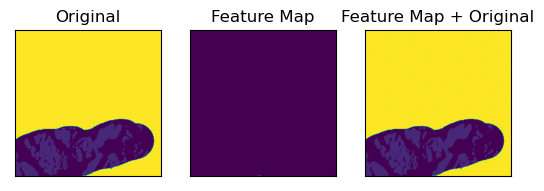

In [23]:
def imshow3(tensor, title=None):
    image = tensor.cpu().clone()  # 텐서의 값에 변화가 적용되지 않도록 텐서를 복제합니다
    image = image.squeeze(0)      # 페이크 배치 차원을 제거 합니다
    image = unloader(image)
    return image

img = imshow3(label[1])
img_numpy = np.array(img)
print('img_numpy Check')
print(img_numpy)


kernel = np.ones((3,3),np.uint8)
result = cv2.morphologyEx(img_numpy/255, cv2.MORPH_TOPHAT, kernel)

print('After Kernel Check')
print(result)

plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(result),plt.title('Feature Map')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img+result),plt.title('Feature Map + Original')
plt.xticks([]),plt.yticks([])
plt.show()

In [24]:
img_size = 512
in_dim = 3
out_dim = 1
num_filters = 64
num_epoch = 100
lr = 0.001

# 앞서 정의한대로 vGG 클래스를 인스턴스화 하고 지정한 장치에 올립니다.
model = UnetGenerator(in_dim=in_dim,out_dim=out_dim,num_filter=num_filters).to(device)

# 손실함수 및 최적화함수를 설정합니다.
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)#, momentum=0.99)


------Initiating U-Net------



In [25]:
len(train_batch)

157

In [ ]:
from tqdm import tqdm

for i in tqdm(range(num_epoch)):
    for j in range(len(train_batch)):
        x = train_batch[j]
        y_= label_batch[j]
        
        optimizer.zero_grad()
        output = model.forward(x)
        
        loss = loss_func(output,y_)
        loss.backward()
        
        optimizer.step()
    if i % 100 ==0:
        print(loss.item())

  1%|▍                                       | 1/100 [04:05<6:45:32, 245.79s/it]

0.12059028446674347


 30%|███████████                          | 30/100 [2:02:31<4:45:34, 244.78s/it]

In [ ]:
test = []
output = []
for i in range(2):
    image = image_loader('./imgs_without_white/' + test_image_name[i])
    test.append(image)

with torch.no_grad():
    for i in range(len(test)):
        output.append(model.forward(test[i]))
    
        if i % 10 == 0:
            print(loss.item())
        
for i in range(5):
    test_image_example = plt.subplot(1,2,1)
    test_image_example.set_title('Test Image: ' + str(i))
    imshow1(test[i])
    
    result_image_example = plt.subplot(1,2,2)
    result_image_example.set_title('Result Image: ' + str(i))
    imshow2(output[i])
    
    plt.show()